<a href="https://colab.research.google.com/github/Slkandu/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Health_insurance.csv')

In [ ]:
df.head()

,pid,age,sex,bmi,smoker,region,diabetes,heart_rate,charges
0,1,19,female,27.900,yes,southwest,1,69,16884.92400
1,2,18,male,33.770,no,southeast,0,102,NaN
2,3,28,male,33.000,no,southeast,0,73,4449.46200
3,4,33,male,22.705,no,northwest,0,95,21984.47061
4,5,32,NaN,28.880,no,northwest,0,68,3866.85520


In [ ]:
df = df.drop_duplicates(subset=['pid'])

In [ ]:
# prompt: remove outliers in all numeric columns

import numpy as np
# Assuming 'df' is your DataFrame and contains numeric columns you want to process.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [ ]:
df.isnull().sum()

,0
pid,0
age,0
sex,1
bmi,0
smoker,0
region,0
diabetes,0
heart_rate,0
charges,0


In [ ]:
df = df.dropna(subset=['charges'])

In [ ]:
# Create a list of columns to fill NA values
columns_to_fill = ['bmi', 'heart_rate']

# Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
    # Convert the column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
category_cols = df.select_dtypes(include="object").columns

for col in category_cols:
    print(df[col].unique())

['female' 'male' nan]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# replace 'Female' with female in sex column

dict1 = {'Female':'female','mal':'male'}

df['sex'] = df['sex'].replace(dict1)

# Calculate the mode of the column
mode_value = df['sex'].mode()[0]

# Replace NaN values with the mode
df['sex'].fillna(mode_value, inplace=True)

<ipython-input-58-52941839f002>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(mode_value, inplace=True)


In [ ]:
# One-hot encode the sex, smoker, region column data
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [ ]:
# Normalize numerical columns

# Store min-max values for later use
min_max_values = {}

cols = ['age', 'bmi','heart_rate']
for i in cols:
  min_val = df[i].min()
  max_val = df[i].max()
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
  min_max_values[i] = (min_val, max_val)


In [ ]:
df.head()

,pid,age,bmi,diabetes,heart_rate,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0.021739,0.378327,1,0.302083,16884.92400,True,False,False,True,False,False,False,True
2,3,0.217391,0.539924,0,0.343750,4449.46200,False,True,True,False,False,False,True,False
3,4,0.326087,0.213720,0,0.572917,21984.47061,False,True,True,False,False,True,False,False
4,5,0.304348,0.409379,0,0.291667,3866.85520,True,False,True,False,False,True,False,False
5,6,0.282609,0.309886,0,0.364583,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
df.corr()

,pid,age,bmi,diabetes,heart_rate,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.008303,-0.009572,0.051340,0.051579,0.003705,-0.033534,0.033534,0.011995,-0.011995,-0.004296,0.020616,-0.044300,0.028243
age,0.008303,1.000000,0.123168,0.088093,-0.012732,0.486130,0.032948,-0.032948,0.048435,-0.048435,-0.009649,-0.003815,-0.012900,0.026531
bmi,-0.009572,0.123168,1.000000,-0.022182,-0.021455,-0.074341,-0.013697,0.013697,0.275601,-0.275601,-0.126131,-0.125159,0.243520,0.006067
diabetes,0.051340,0.088093,-0.022182,1.000000,-0.122170,0.011491,0.026537,-0.026537,0.019740,-0.019740,0.038623,0.012986,-0.018318,-0.033127
heart_rate,0.051579,-0.012732,-0.021455,-0.122170,1.000000,0.007106,0.008054,-0.008054,-0.028640,0.028640,0.021859,-0.073256,0.059028,-0.007409
charges,0.003705,0.486130,-0.074341,0.011491,0.007106,1.000000,0.021462,-0.021462,-0.562824,0.562824,0.057956,0.052197,-0.033101,-0.077120
sex_female,-0.033534,0.032948,-0.013697,0.026537,0.008054,0.021462,1.000000,-1.000000,0.025378,-0.025378,-0.006457,-0.009040,0.017444,-0.002061
sex_male,0.033534,-0.032948,0.013697,-0.026537,-0.008054,-0.021462,-1.000000,1.000000,-0.025378,0.025378,0.006457,0.009040,-0.017444,0.002061
smoker_no,0.011995,0.048435,0.275601,0.019740,-0.028640,-0.562824,0.025378,-0.025378,1.000000,-1.000000,-0.022811,-0.035668,0.014557,0.044106
smoker_yes,-0.011995,-0.048435,-0.275601,-0.019740,0.028640,0.562824,-0.025378,0.025378,-1.000000,1.000000,0.022811,0.035668,-0.014557,-0.044106


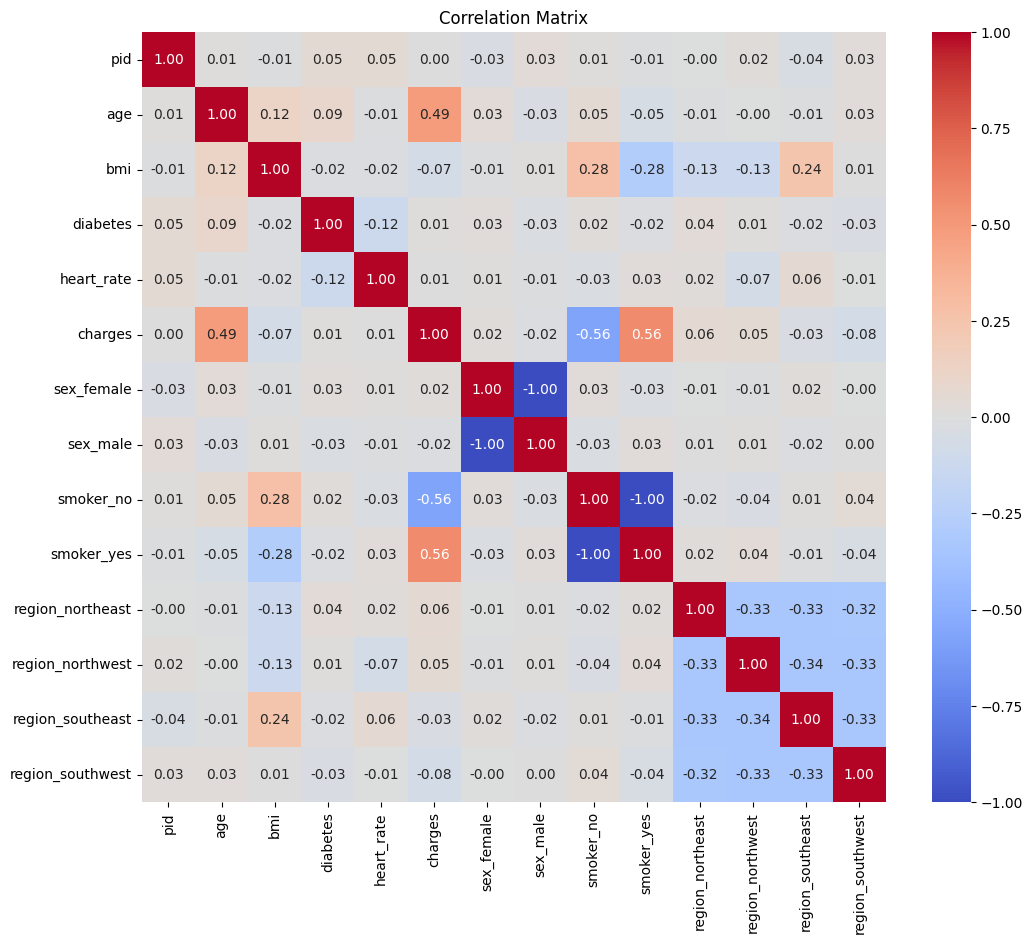

In [ ]:
# prompt: seaborn correlation matrixx

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Separate the features and target variable
X = df.drop(columns = ['charges','pid','sex_male', 'smoker_yes'], axis=1)
y = df['charges']

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Linear Regression model to predict the outcome

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred = reg.predict(X_test)


In [ ]:
# compute the rmse, r2 score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2)


RMSE:  4888.682606707583
R2:  0.5298370645392086


In [ ]:
pd.DataFrame(X.columns,reg.coef_)

,0
12138.256871,age
1625.894600,bmi
-56.537959,diabetes
617.289292,heart_rate
277.184711,sex_female
-13723.883200,smoker_no
974.320946,region_northeast
212.826365,region_northwest
-225.382615,region_southeast
-961.764696,region_southwest


In [ ]:
x_test_sample = X_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1, -1)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
